In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('Flight_data.csv')

In [56]:
df.drop(columns='Unnamed: 0' , inplace=True)

In [57]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [58]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [60]:
df.duplicated().sum()

np.int64(0)

In [61]:
df.drop_duplicates(inplace=True)

## Univariate Analysis

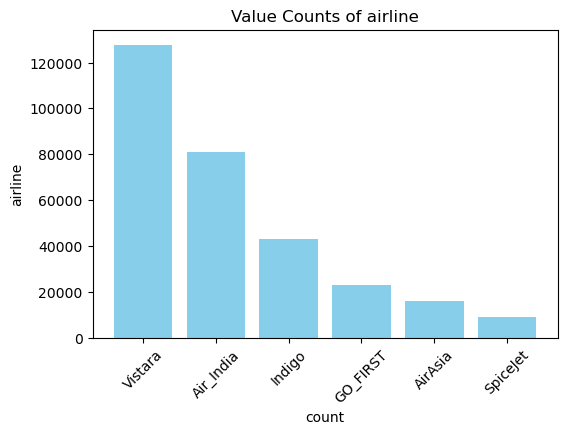

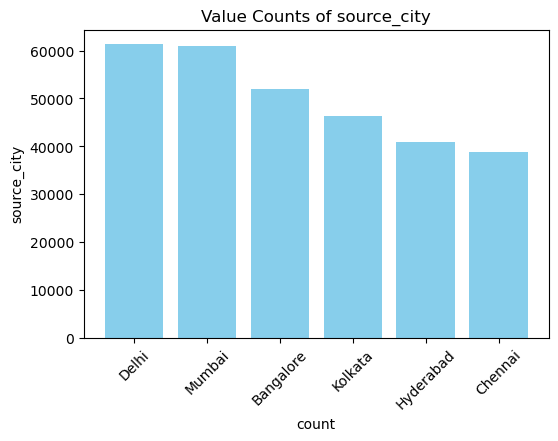

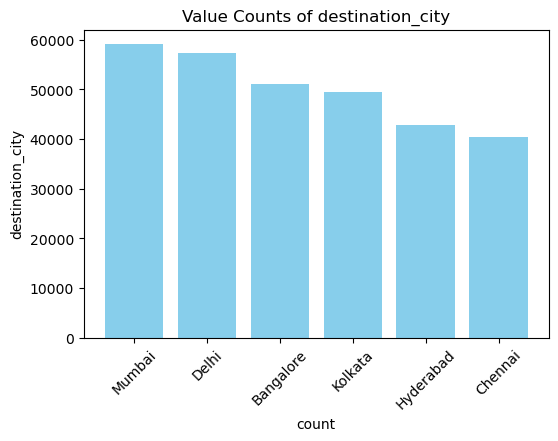

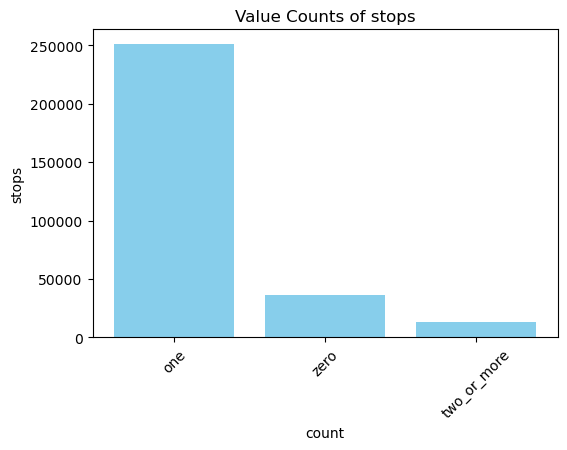

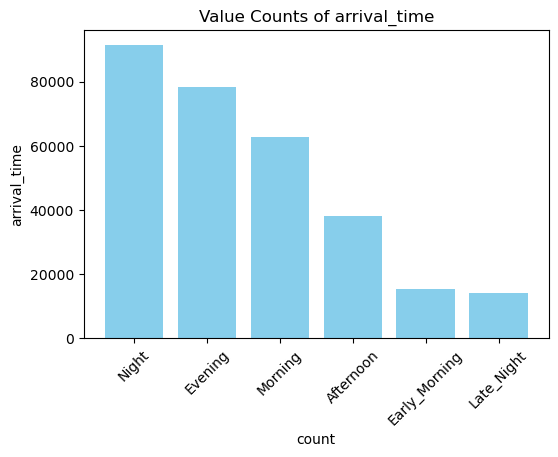

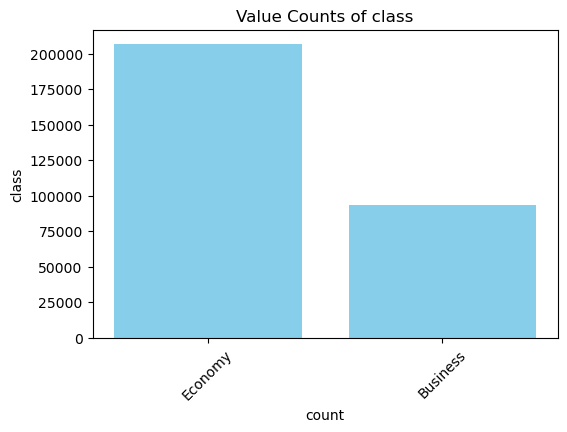

In [62]:
for col in ['airline' , 'source_city' , 'destination_city' , 'stops' , 'arrival_time' , 'class']:
    count = df[col].value_counts()
    plt.figure(figsize=(6,4))
    plt.title(f'Value Counts of {col}')
    plt.bar(count.index,count.values , color = 'skyblue')
    plt.xlabel('count')
    plt.ylabel(col)
    plt.xticks(rotation = 45)
    plt.show()

In [63]:
df['flight'].value_counts()

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64

In [64]:
df['flight'].nunique()

1561

Flight is not very related and is unique for many different flight -> so drop


In [65]:
df.drop(columns='flight' , inplace= True)

<Axes: xlabel='days_left', ylabel='Density'>

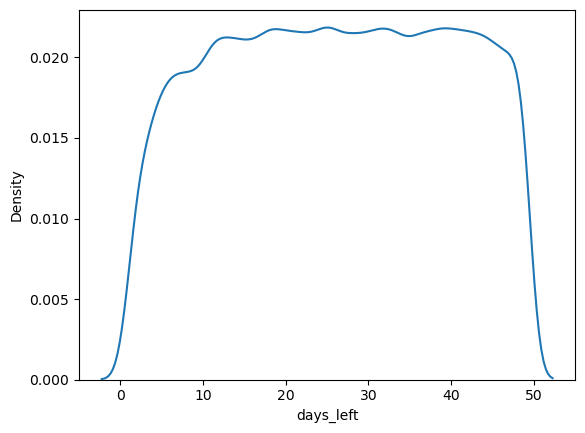

In [66]:
sns.kdeplot(df['days_left'])

<Axes: xlabel='price', ylabel='Density'>

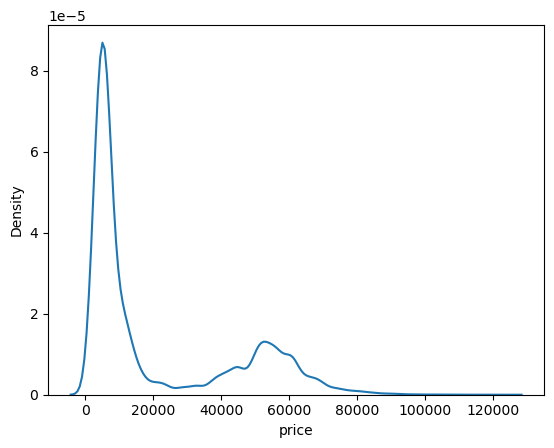

In [67]:
sns.kdeplot(df['price'])

## Bivariate Analysis

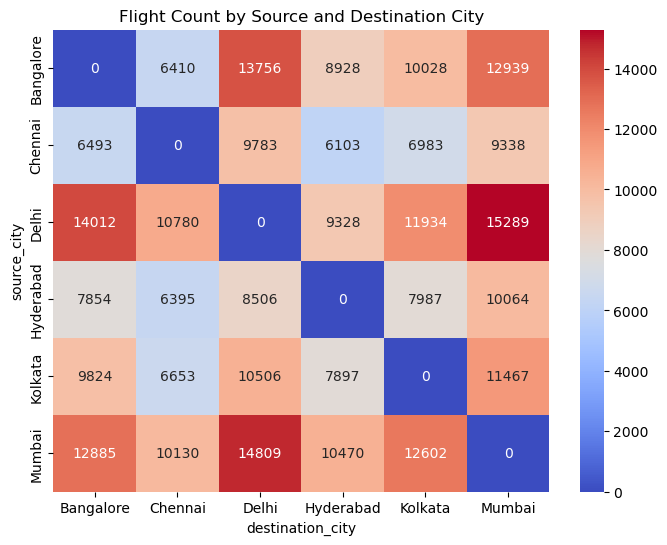

In [68]:
plt.figure(figsize=(8,6))
a = pd.crosstab(df['source_city'], df['destination_city'])

sns.heatmap(a, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Flight Count by Source and Destination City')
plt.show()

Most Frequet flights -> 
- Delhi → Mumbai ≈ very high
- Mumbai → Delhi ≈ very high
- Bangalore → Delhi
- Delhi → Bangalore

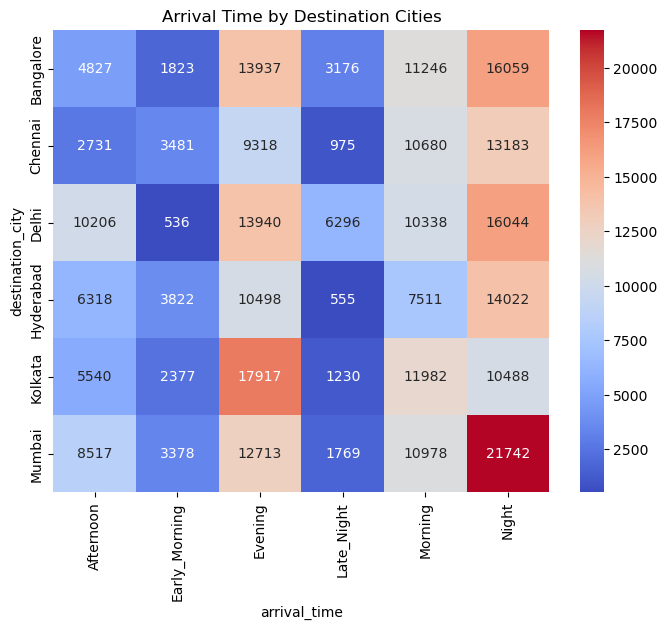

In [69]:
plt.figure(figsize=(8,6))
b = pd.crosstab(df['destination_city'] , df['arrival_time'])
sns.heatmap(b , cmap= 'coolwarm' , annot= True , fmt='.0f')
plt.title('Arrival Time by Destination Cities')
plt.show()

Ammong all cities
| Arrival Time  | Pattern      |
| ------------- | ------------ |
| Evening       |  Very busy |
| Night         |  Very busy |
| Morning       | Medium-High  |
| Afternoon     | Medium       |
| Early_Morning |  Low       |
| Late_Night    |  Very low  |


In [70]:
df['days_bucket'] = pd.cut(
    df['days_left'],
    bins=[0,10,20,30,40,50,60,70,80,90,100],
    labels=[
        '0-10','11-20','21-30','31-40','41-50',
        '51-60','61-70','71-80','81-90','91-100'
    ],
    include_lowest=True
)


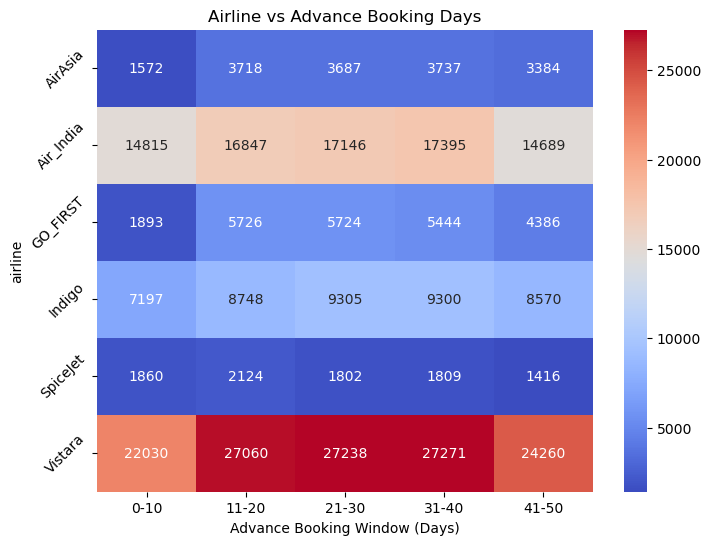

In [71]:
plt.figure(figsize=(8,6))
b = pd.crosstab(df['airline'] , df['days_bucket'])
sns.heatmap(b , cmap= 'coolwarm' , annot= True , fmt='.0f')
plt.title('Airline vs Advance Booking Days')
plt.xlabel('Advance Booking Window (Days)')
plt.yticks(rotation = 45)
plt.show()

Most customers book flights 3–6 weeks in advance.

In [72]:
df['price_bucket'] = pd.cut(
    df['price'],
    bins=[0, 3000, 6000, 9000, 12000, 15000, 20000, 30000, 50000],
    labels=[
        '0-3k','3k-6k','6k-9k','9k-12k',
        '12k-15k','15k-20k','20k-30k','30k+'
    ],
    include_lowest=True
)


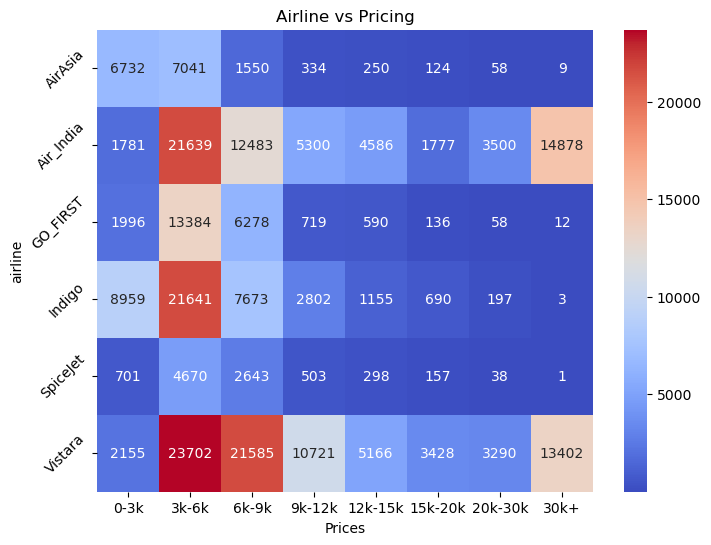

In [73]:
plt.figure(figsize=(8,6))
b = pd.crosstab(df['airline'] , df['price_bucket'])
sns.heatmap(b , cmap= 'coolwarm' , annot= True , fmt='.0f')
plt.title('Airline vs Pricing')
plt.xlabel('Prices')
plt.yticks(rotation = 45)
plt.show()

Vistara , Indigo , Go_First , Air_india dominate in Budget pricing section 
Vistara , Air_india also dominate in Luxry Pricing 


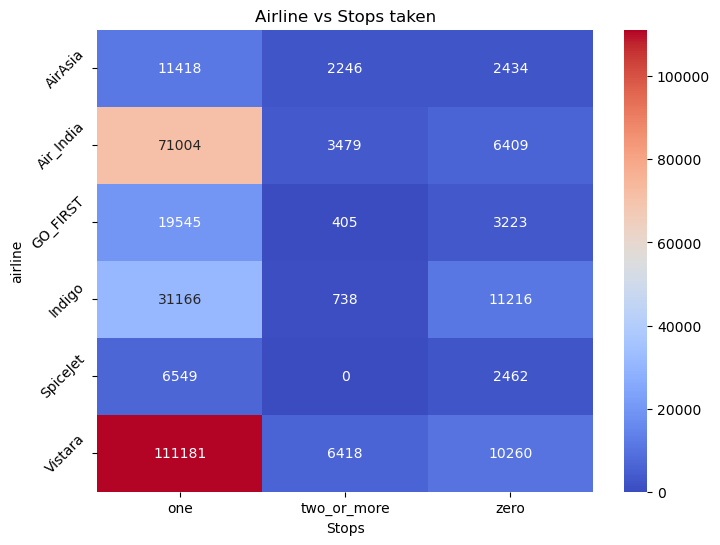

In [74]:
plt.figure(figsize=(8,6))
b = pd.crosstab(df['airline'] , df['stops'])
sns.heatmap(b , cmap= 'coolwarm' , annot= True , fmt='.0f')
plt.title('Airline vs Stops taken')
plt.xlabel('Stops')
plt.yticks(rotation = 45)
plt.show()

<Axes: ylabel='price'>

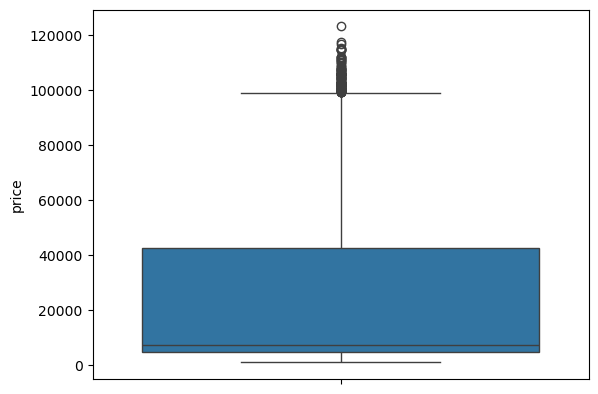

In [75]:
sns.boxplot(df['price'])